In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=yf.download('Reliance.NS',start='2015-01-01',end='2022-12-30')
pd.set_option('display.max_rows', None)
data

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2015-01-01   438.988831   441.812073   437.676270   439.781311   417.988953   
2015-01-02   439.880371   443.818054   437.998199   438.617340   416.882629   
2015-01-05   438.344940   441.267212   432.946106   433.812897   412.316223   
2015-01-06   430.915344   432.401276   412.093750   414.124512   393.603516   
2015-01-07   414.619812   425.367950   414.570282   423.139069   402.171326   
2015-01-08   426.011841   427.398682   416.130493   417.071564   396.404480   
2015-01-09   420.216766   426.952911   418.532715   426.110901   404.995911   
2015-01-12   426.209961   426.457611   416.848694   421.157837   400.288300   
2015-01-13   422.495178   423.460999   416.303864   417.616425   396.922363   
2015-01-14   417.542114   419.523346   411.697510   413.554901   393.062103   
2015-01-15   416.056213   431.460175   416.056213   428.067352   406.855408   
2015-01-16   425.962311   433.391876   422.024628   430.766754   409.421021   
2015-01-19   431.014404   438.840240   425.343170   435.695038   414.105103   
2015-01-20   436.611359   448.523438   435.298798   447.285187   425.121002   
2015-01-21   448.251038   451.420990   441.836823   449.117798   426.862762   
2015-01-22   448.325317   449.340698   435.620758   437.725800   416.035278   
2015-01-23   440.821442   444.684845   434.382477   439.286011   417.518158   
2015-01-27   442.257843   444.139984   436.116058   440.350922   418.530304   
2015-01-28   438.889771   450.628479   438.889771   449.167328   426.909821   
2015-01-29   449.291168   462.862518   449.192108   460.336456   437.525452   
2015-01-30   460.633667   461.252777   450.232239   453.327911   430.864258   
2015-02-02   453.724152   455.631073   448.597748   449.761719   427.474762   
2015-02-03   452.312531   466.007721   452.312531   464.397980   441.385742   
2015-02-04   465.140930   467.468872   458.602905   460.039276   437.243042   
2015-02-05   463.605469   465.537170   454.491882   457.513245   434.842163   
2015-02-06   457.711365   460.633667   447.260406   450.678009   428.345642   
2015-02-09   446.368866   454.690002   441.812073   444.139984   422.131592   
2015-02-10   444.783905   448.003387   426.606201   436.859009   415.211426   
2015-02-11   438.840240   448.127197   437.354309   446.121216   424.014648   
2015-02-12   449.736938   452.684021   439.459351   450.306549   427.992584   
2015-02-13   452.708771   456.076843   450.257019   454.442352   431.923462   
2015-02-16   455.036713   457.760895   445.774506   447.161346   425.003235   
2015-02-18   445.774506   449.736938   443.000793   446.591766   424.461853   
2015-02-19   449.216858   449.538818   439.607971   446.789886   424.650177   
2015-02-20   443.421814   443.793274   431.559235   432.450806   411.021637   
2015-02-23   430.890594   434.258667   419.572876   421.727448   400.829712   
2015-02-24   423.114288   424.377319   414.570282   416.774384   396.122070   
2015-02-25   420.414886   424.228729   416.576263   417.616425   396.922363   
2015-02-26   419.077576   421.009247   414.372162   417.046814   396.381012   
2015-02-27   419.795746   426.457611   418.334595   423.758209   402.759766   
2015-03-02   430.420044   433.639526   423.758209   428.067352   406.855408   
2015-03-03   430.420044   448.969208   429.627563   446.170746   424.061737   
2015-03-04   448.746338   450.554199   435.893158   439.756561   417.965393   
2015-03-05   442.059723   445.155365   434.952087   438.320160   416.600128   
2015-03-09   438.394470   441.688232   428.017822   430.742004   409.397552   
2015-03-10   430.395294   433.788116   423.683899   425.541290   404.454529   
2015-03-11   426.432831   430.717224   422.197998   423.956329   402.948120   
2015-03-12   424.971680   429.627563   423.782959   427.844452   406.643555   
2015-03-13   430.420044   430.717224   419.523346   421.058777   400.

In [4]:
data.duplicated()

Date
2015-01-01    False
2015-01-02    False
2015-01-05    False
2015-01-06    False
2015-01-07    False
2015-01-08    False
2015-01-09    False
2015-01-12    False
2015-01-13    False
2015-01-14    False
2015-01-15    False
2015-01-16    False
2015-01-19    False
2015-01-20    False
2015-01-21    False
2015-01-22    False
2015-01-23    False
2015-01-27    False
2015-01-28    False
2015-01-29    False
2015-01-30    False
2015-02-02    False
2015-02-03    False
2015-02-04    False
2015-02-05    False
2015-02-06    False
2015-02-09    False
2015-02-10    False
2015-02-11    False
2015-02-12    False
2015-02-13    False
2015-02-16    False
2015-02-18    False
2015-02-19    False
2015-02-20    False
2015-02-23    False
2015-02-24    False
2015-02-25    False
2015-02-26    False
2015-02-27    False
2015-03-02    False
2015-03-03    False
2015-03-04    False
2015-03-05    False
2015-03-09    False
2015-03-10    False
2015-03-11    False
2015-03-12    False
2015-03-13    False
2015-03-16    F

In [5]:
data.isna()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2015-01-01  False  False  False  False      False   False
2015-01-02  False  False  False  False      False   False
2015-01-05  False  False  False  False      False   False
2015-01-06  False  False  False  False      False   False
2015-01-07  False  False  False  False      False   False
2015-01-08  False  False  False  False      False   False
2015-01-09  False  False  False  False      False   False
2015-01-12  False  False  False  False      False   False
2015-01-13  False  False  False  False      False   False
2015-01-14  False  False  False  False      False   False
2015-01-15  False  False  False  False      False   False
2015-01-16  False  False  False  False      False   False
2015-01-19  False  False  False  False      False   False
2015-01-20  False  False  False  False      False   False
2015-01-21  False  False  False  False      False   False
2015-01-22  False  False  False  False      False   False
2015-01-23  False  False  False  False      False   False
2015-01-27  False  False  False  False      False   False
2015-01-28  False  False  False  False      False   False
2015-01-29  False  False  False  False      False   False
2015-01-30  False  False  False  False      False   False
2015-02-02  False  False  False  False      False   False
2015-02-03  False  False  False  False      False   False
2015-02-04  False  False  False  False      False   False
2015-02-05  False  False  False  False      False   False
2015-02-06  False  False  False  False      False   False
2015-02-09  False  False  False  False      False   False
2015-02-10  False  False  False  False      False   False
2015-02-11  False  False  False  False      False   False
2015-02-12  False  False  False  False      False   False
2015-02-13  False  False  False  False      False   False
2015-02-16  False  False  False  False      False   False
2015-02-18  False  False  False  False      False   False
2015-02-19  False  False  False  False      False   False
2015-02-20  False  False  False  False      False   False
2015-02-23  False  False  False  False      False   False
2015-02-24  False  False  False  False      False   False
2015-02-25  False  False  False  False      False   False
2015-02-26  False  False  False  False      False   False
2015-02-27  False  False  False  False      False   False
2015-03-02  False  False  False  False      False   False
2015-03-03  False  False  False  False      False   False
2015-03-04  False  False  False  False      False   False
2015-03-05  False  False  False  False      False   False
2015-03-09  False  False  False  False      False   False
2015-03-10  False  False  False  False      False   False
2015-03-11  False  False  False  False      False   False
2015-03-12  False  False  False  False      False   False
2015-03-13  False  False  False  False      False   False
2015-03-16  False  False  False  False      False   False
2015-03-17  False  False  False  False      False   False
2015-03-18  False  False  False  False      False   False
2015-03-19  False  False  False  False      False   False
2015-03-20  False  False  False  False      False   False
2015-03-23  False  False  False  False      False   False
2015-03-24  False  False  False  False      False   False
2015-03-25  False  False  False  False      False   False
2015-03-26  False  False  False  False      False   False
2015-03-27  False  False  False  False      False   False
2015-03-30  False  False  False  False      False   False
2015-03-31  False  False  False  False      False   False
2015-04-01  False  False  False  False      False   False
2015-04-06  False  False  False  False      False   False
2015-04-07  False  False  False  False      False   False
2015-04-08  False  False  False  False      False   False
2015-04-09  False  False  False  False      False   False
2015-04-10  False  False  False  False      False   False
2015-04-13 

In [6]:
data.dropna(axis=0,inplace=True)

In [7]:
data=data.dropna()

In [8]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
data.shape

(1975, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1975 entries, 2015-01-01 to 2022-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1975 non-null   float64
 1   High       1975 non-null   float64
 2   Low        1975 non-null   float64
 3   Close      1975 non-null   float64
 4   Adj Close  1975 non-null   float64
 5   Volume     1975 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 108.0 KB


In [11]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  1975.000000  1975.000000  1975.000000  1975.000000  1975.000000   
mean   1315.179125  1330.164275  1299.554631  1314.265526  1299.817380   
std     751.883488   760.172230   743.035442   751.276003   755.452887   
min     404.466064   405.010895   394.485657   401.568542   381.669647   
25%     530.112579   537.319244   525.939636   531.833740   515.988281   
50%    1168.919800  1186.998413  1151.385986  1169.811401  1155.051392   
75%    2040.775024  2065.175049  2003.125000  2033.549988  2020.944702   
max    2856.149902  2856.149902  2786.100098  2819.850098  2811.385742   

             Volume  
count  1.975000e+03  
mean   9.091729e+06  
std    6.693890e+06  
min    7.871600e+05  
25%    5.242932e+06  
50%    7.151632e+06  
75%    1.025320e+07  
max    6.584835e+07

## Correlation

In [13]:
data.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999740  0.999739  0.999459   0.999452  0.073167
High       0.999740  1.000000  0.999679  0.999799   0.999788  0.082296
Low        0.999739  0.999679  1.000000  0.999773   0.999768  0.066584
Close      0.999459  0.999799  0.999773  1.000000   0.999990  0.075249
Adj Close  0.999452  0.999788  0.999768  0.999990   1.000000  0.074584
Volume     0.073167  0.082296  0.066584  0.075249   0.074584  1.000000

<AxesSubplot: >

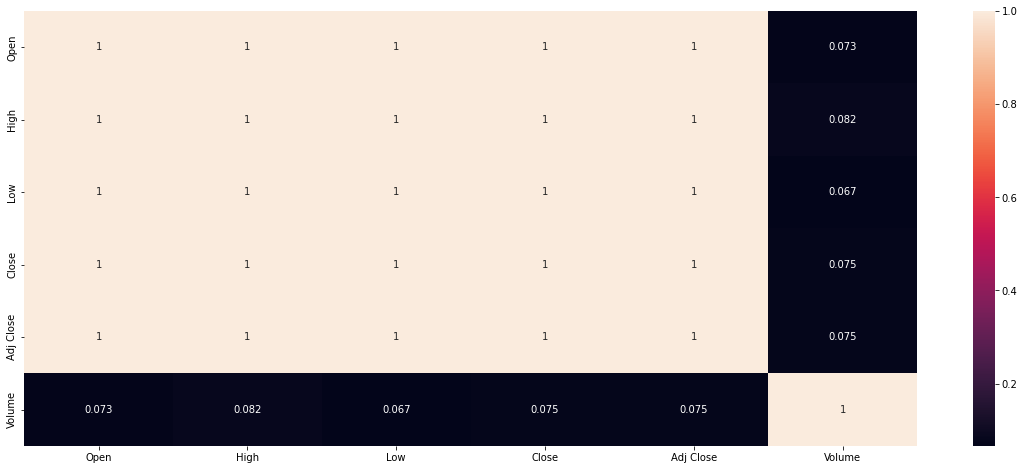

In [14]:
corr = data[data.columns].corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)

From above heatmap we can conclude that features like Open price, High price, Low price, Close price, VWAP has high correlation.

# MANUAL EDA

In [15]:
#boxplot visualization
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Open         1.510662e+03
High         1.527856e+03
Low          1.477185e+03
Close        1.501716e+03
Adj Close    1.504956e+03
Volume       5.010271e+06
dtype: float64


<AxesSubplot: xlabel='Open'>

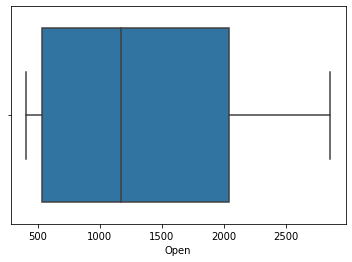

In [16]:
sns.boxplot(x=data['Open'])

<AxesSubplot: xlabel='Close'>

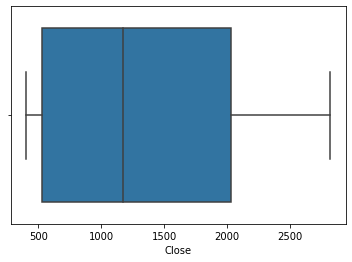

In [17]:
sns.boxplot(x=data['Close'])

<AxesSubplot: xlabel='Low'>

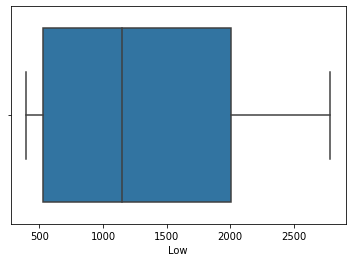

In [18]:
sns.boxplot(x=data['Low'])

<AxesSubplot: xlabel='High'>

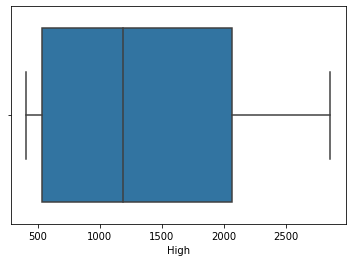

In [19]:
sns.boxplot(x=data['High'])

<AxesSubplot: xlabel='Adj Close'>

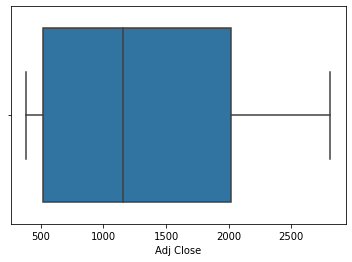

In [20]:
sns.boxplot(x=data['Adj Close'])

<AxesSubplot: xlabel='Volume'>

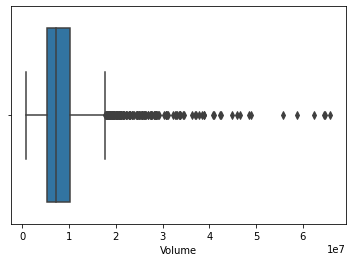

In [21]:
sns.boxplot(x=data['Volume'])

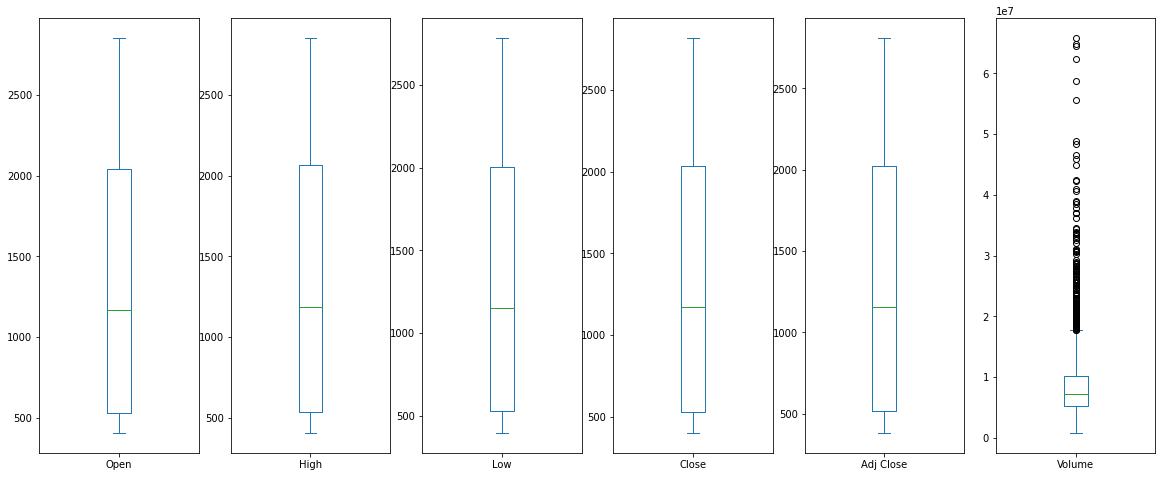

In [22]:
#Box plot
data.plot(kind='box',subplots=True,figsize=(20,8),sharex=False,sharey=False)
plt.show()

there are lot of outliers in volume

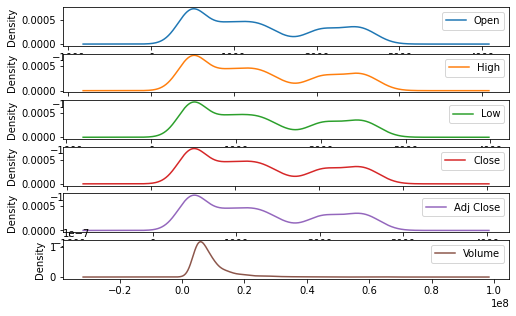

In [23]:
#density plots
data.plot(kind='density',subplots=True,figsize=(8,5),sharex=False)
plt.show()


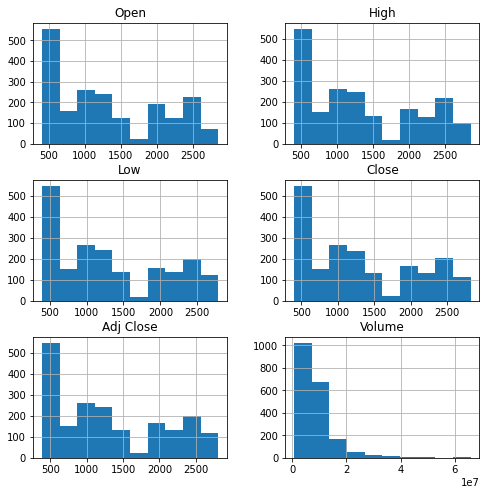

In [24]:
#Histogram
data.hist(figsize=(8,8))
plt.show()

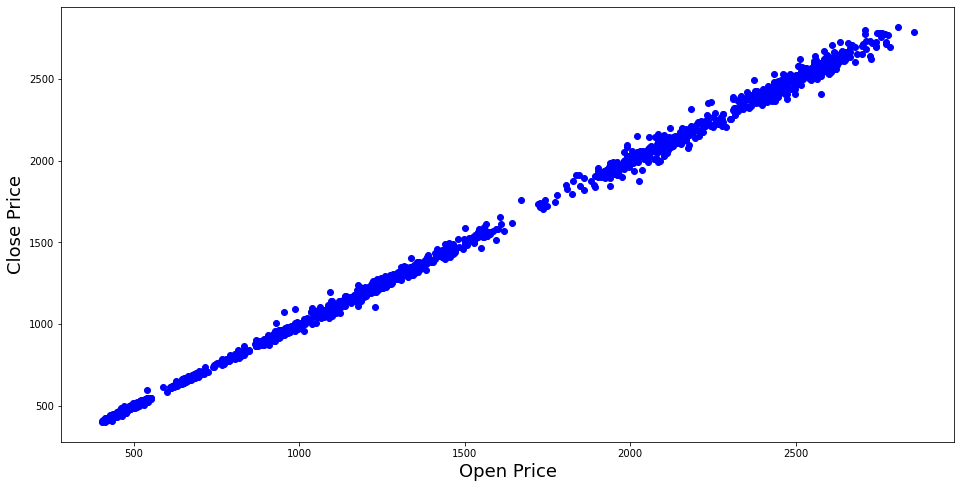

In [25]:
#scatterplot
plt.figure(figsize=(16,8))
plt.title=('Price history')
plt.scatter(x=data['Open'],y=data['Close'],color='blue')
plt.xlabel('Open Price',fontsize=18) 
plt.ylabel('Close Price',fontsize=18)
plt.show()

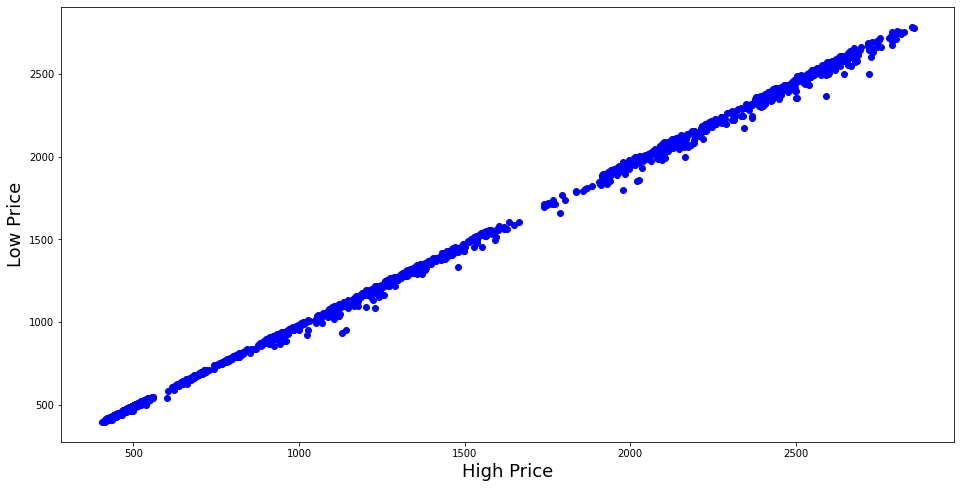

In [26]:
plt.figure(figsize=(16,8))
plt.title=('Price history')
plt.scatter(x=data['High'],y=data['Low'],color='blue')
plt.xlabel('High Price',fontsize=18) 
plt.ylabel('Low Price',fontsize=18)
plt.show()

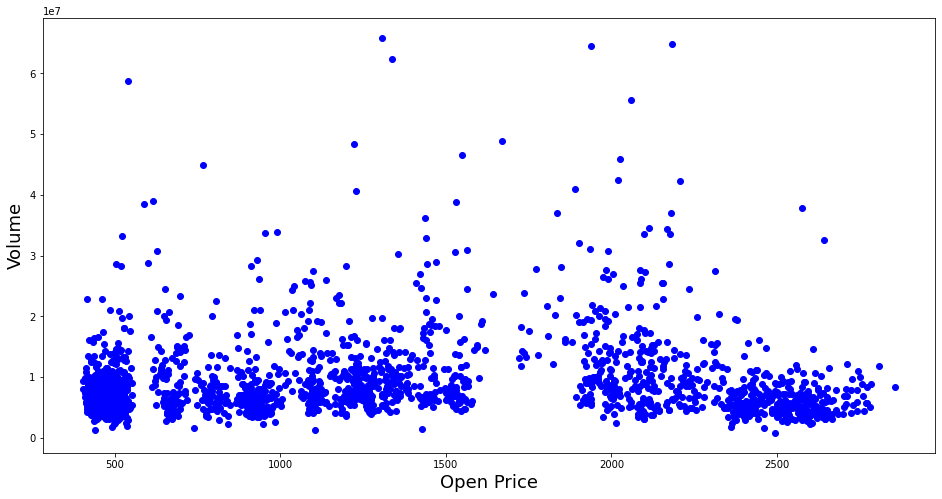

In [27]:
plt.figure(figsize=(16,8))
plt.title=('Price history')
plt.scatter(x=data['Open'],y=data['Volume'],color='blue')
plt.xlabel('Open Price',fontsize=18) 
plt.ylabel('Volume',fontsize=18)
plt.show()

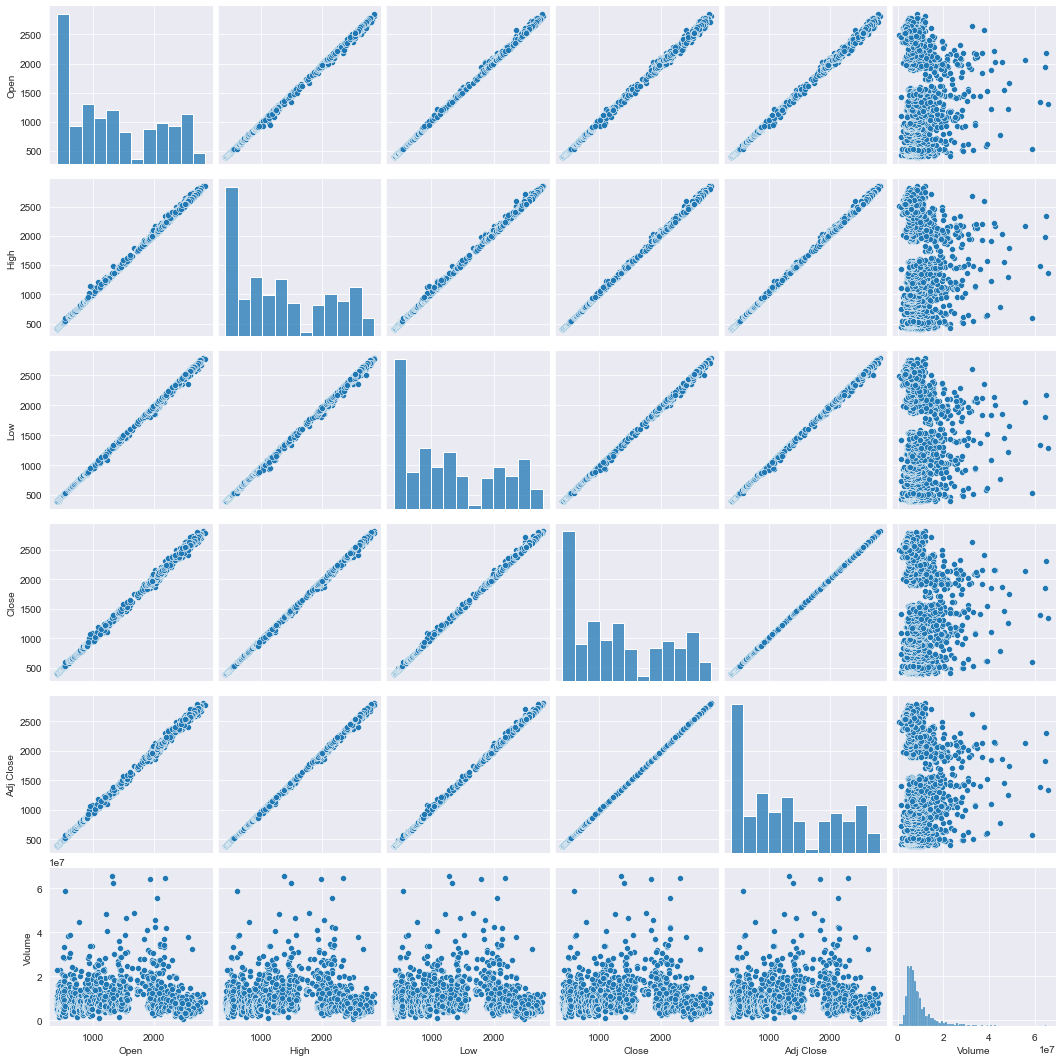

In [28]:
#pairplot Gives all different types of scatterplot
sns.set_style(style='darkgrid')
sns.pairplot(data)
plt.show()

In [29]:
num_columns=data.select_dtypes(exclude='object').columns.tolist()

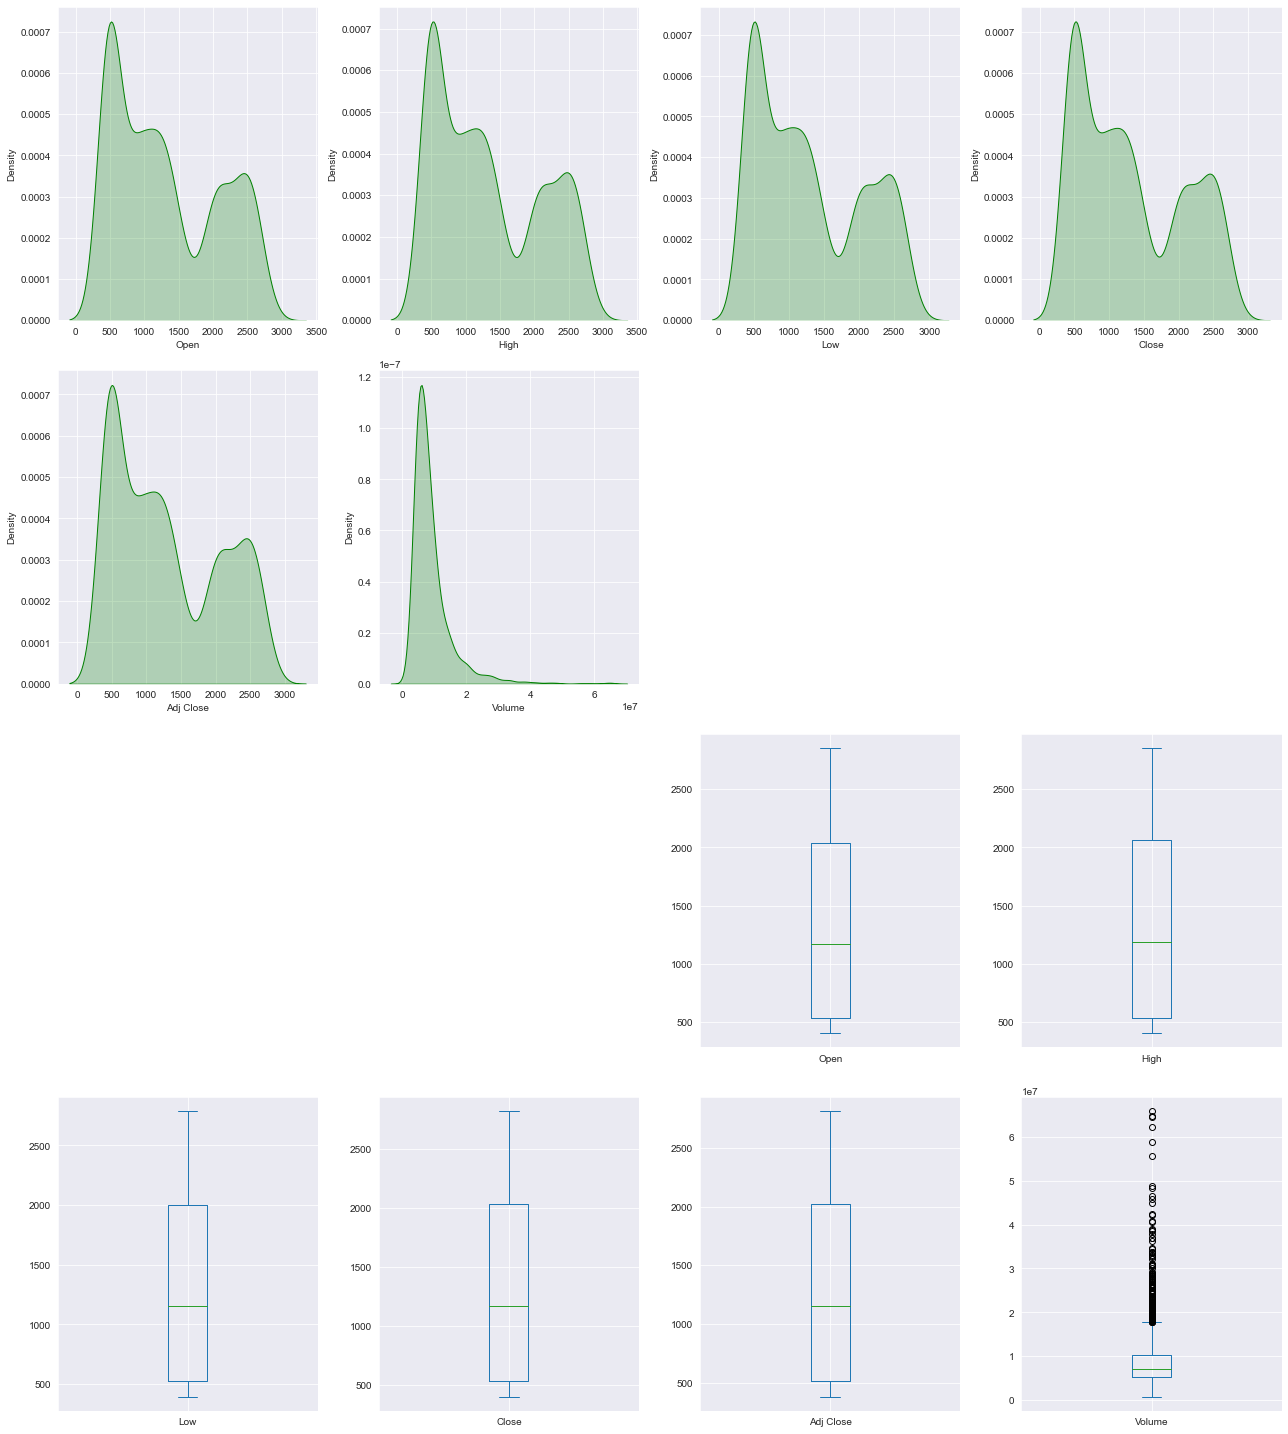

Open      High       Low     Close  Adj Close     Volume
skewness  0.439303  0.437199  0.443376  0.440620   0.445818   3.327632
kurtosis -1.222506 -1.223962 -1.216762 -1.219131  -1.215208  16.815287

In [30]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    data[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

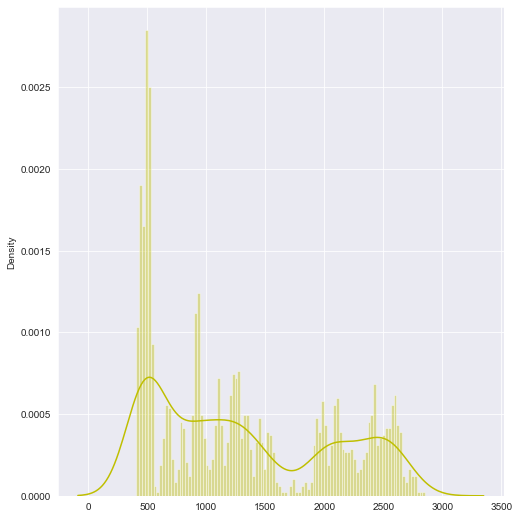

In [31]:
#Distribution plots
plt.figure(figsize=(8,9))
sns.distplot(data[['Open']],color='y', bins=100,hist_kws={'alpha':0.4});
plt.show()
import warnings
warnings.filterwarnings('ignore')

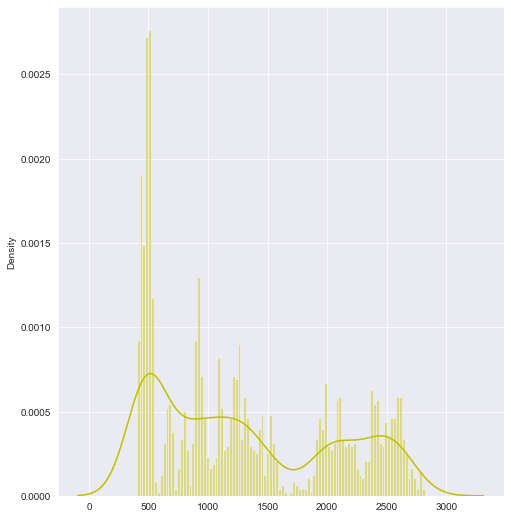

In [32]:
#Distribution plots
plt.figure(figsize=(8,9))
sns.distplot(data[['Close']],color='y', bins=100,hist_kws={'alpha':0.4});
plt.show()
import warnings
warnings.filterwarnings('ignore')

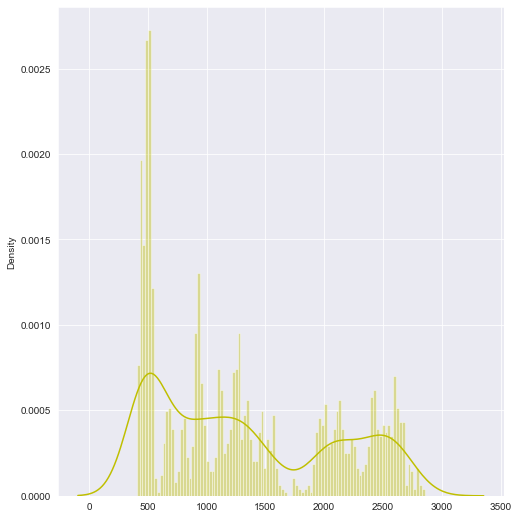

In [33]:
#Distribution plots
plt.figure(figsize=(8,9))
sns.distplot(data[['High']],color='y', bins=100,hist_kws={'alpha':0.4});
plt.show()
import warnings
warnings.filterwarnings('ignore')

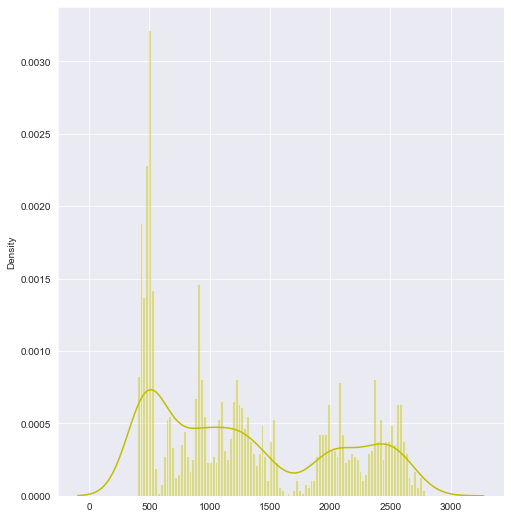

In [34]:
#Distribution plots
plt.figure(figsize=(8,9))
sns.distplot(data[['Low']],color='y', bins=100,hist_kws={'alpha':0.4});
plt.show()
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot: xlabel='Date'>

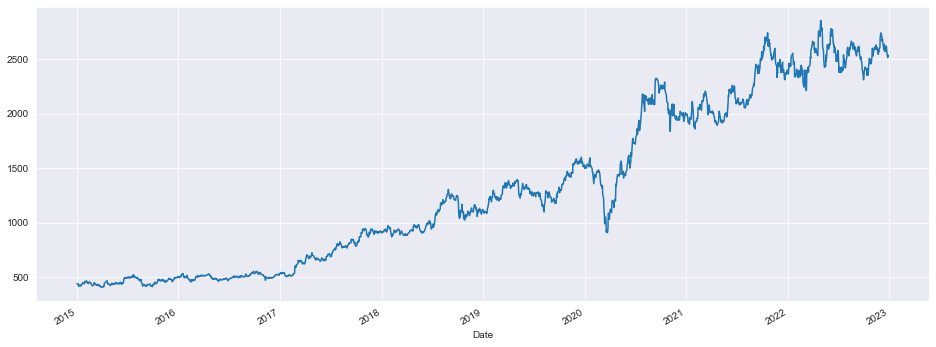

In [35]:
#let view historical view of each column
data['Open'].plot(figsize=(16,6))

<AxesSubplot: xlabel='Date'>

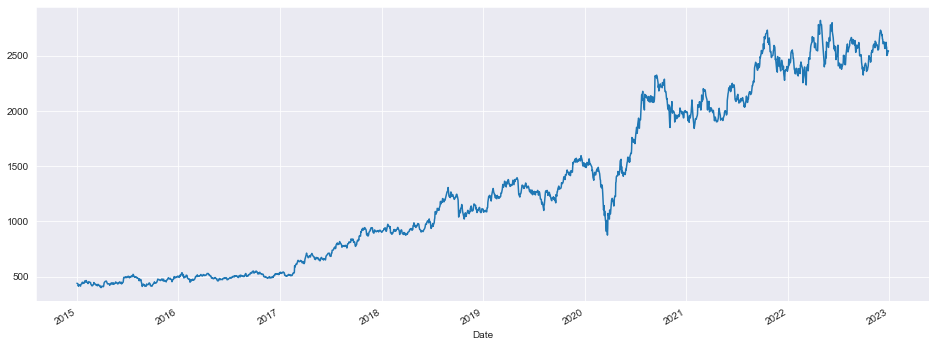

In [36]:
data['Close'].plot(figsize=(16,6))

<AxesSubplot: xlabel='Date'>

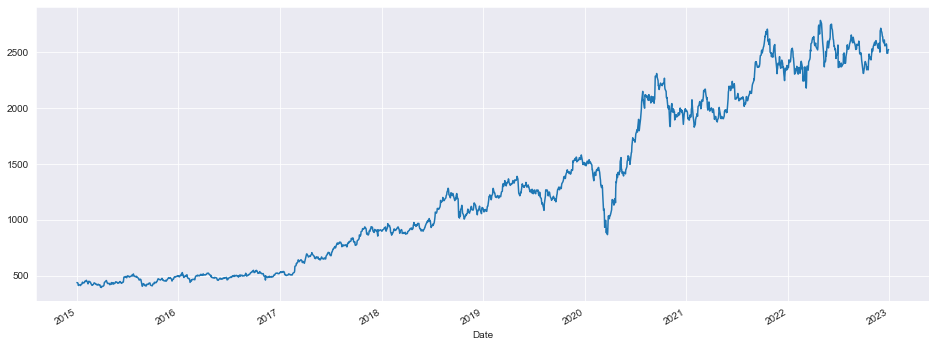

In [37]:
data['Low'].plot(figsize=(16,6))

<AxesSubplot: xlabel='Date'>

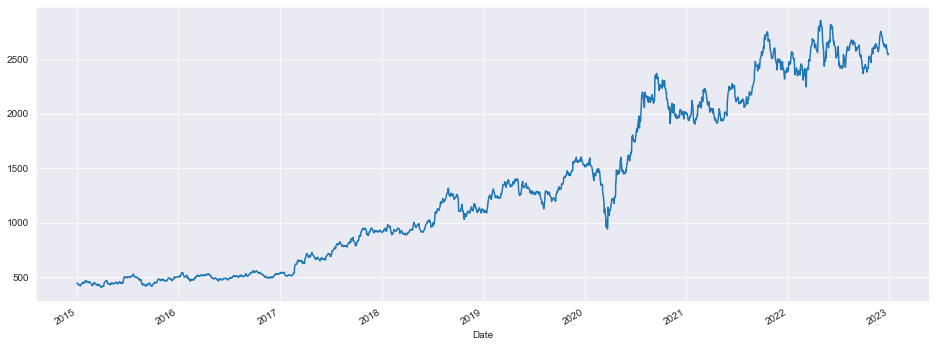

In [38]:
data['High'].plot(figsize=(16,6))

<AxesSubplot: xlabel='Date'>

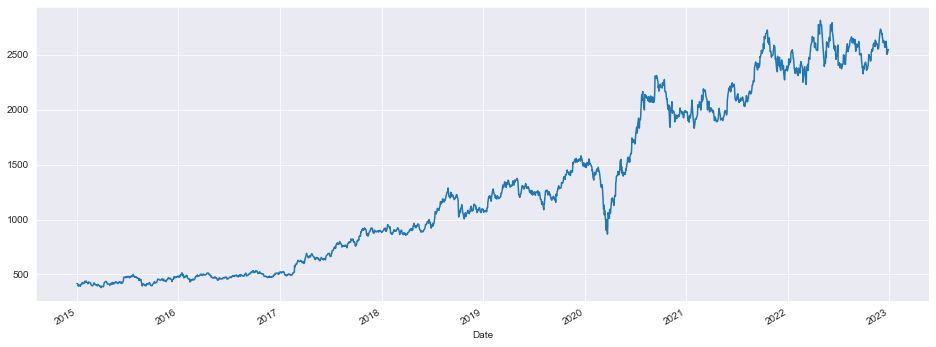

In [39]:
data['Adj Close'].plot(figsize=(16,6))

<AxesSubplot: xlabel='Date'>

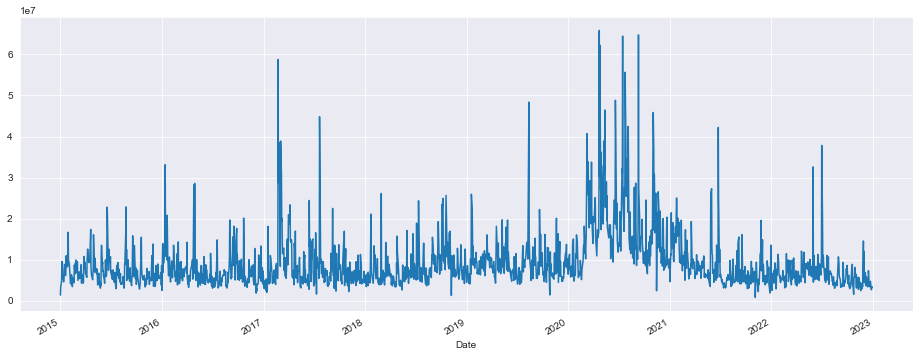

In [40]:
data['Volume'].plot(figsize=(16,6))

# AUTOMATED EDA

# dtale

In [41]:
!pip install dtale
import dtale
dtale.show(data)

## Sweetviz and Pandas profiling

In [42]:
!pip install sweetviz
!pip install pandas_profiling
!pip install markupsafe

In [43]:
import sweetviz as sv
sweet_report=sv.analyze(data)
sweet_report.show_html('stock_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report stock_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [44]:
import pandas_profiling as pan_prof
stock_report=pan_prof.ProfileReport(data)
stock_report.to_file(output_file='report.html')
stock_report

2023-03-15 16:22:52,112 - INFO     - Pandas backend loaded 1.4.2
2023-03-15 16:22:52,177 - INFO     - Numpy backend loaded 1.21.5
2023-03-15 16:22:52,177 - INFO     - Pyspark backend NOT loaded
2023-03-15 16:22:52,186 - INFO     - Python backend loaded


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Model Building

In [45]:
#Linear Regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Split dataset into training and testing sets
X = data.drop([ 'Close'], axis=1)
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# calculate the mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)


MAE: 2.5952613573372623
MSE: 10.61863756117591
R2 Score: 0.9999817583888332


In [46]:
#ARIMA
from subprocess import check_output
import warnings
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true)))) 

train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 1581.967
Symmetric mean absolute percentage error: 1.212


In [47]:
#SVM
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Split dataset into training and testing sets
X = data.drop(['Close'], axis=1)
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
svm = SVR(kernel='rbf', gamma='scale')
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Calculate MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

MAE: 657.7346810163847
MSE: 614872.5621428327
R2 Score: -0.05628110302784983


In [48]:
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Split dataset into training and testing sets
X = data.drop(['Close'], axis=1)
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Calculate MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

MAE: 2.367326164921629
MSE: 12.09286242697306
R2 Score: 0.9999792258382475


In [49]:
!pip install keras

In [50]:
!pip install tensorflow

In [51]:
#LSTM
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data=yf.download('Reliance.NS',start='2015-01-01',end='2022-12-30')
data

# Load and preprocess the data
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]

# Define function to create time series dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:(i+look_back), 0])
        Y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(Y)

# Create time series dataset
look_back = 10
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

# Reshape input data to be [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(look_back, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
lstm_model.fit(train_X, train_Y, epochs=100, batch_size=32)

# Make predictions
train_predict = lstm_model.predict(train_X)
test_predict = lstm_model.predict(test_X)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
train_Y = scaler.inverse_transform([train_Y])
test_predict = scaler.inverse_transform(test_predict)
test_Y = scaler.inverse_transform([test_Y])

# Calculate root mean squared error
train_score = mean_squared_error(train_Y[0], train_predict[:,0], squared=False)
print('Train Score: %.2f RMSE' % (train_score))
test_score = mean_squared_error(test_Y[0], test_predict[:,0], squared=False)
print('Test Score: %.2f RMSE' % (test_score))

train_score = mean_squared_error(train_Y[0], train_predict[:,0], squared=True)
print('Train Score: %.2f MSE' % (train_score))
test_score = mean_squared_error(test_Y[0], test_predict[:,0], squared=True)
print('Test Score: %.2f MSE' % (test_score))

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
50/50 [==============================] - 6s 10ms/step - loss: 0.0244
Epoch 2/100
50/50 [==============================] - 0s 10ms/step - loss: 5.3948e-04
Epoch 3/100
50/50 [==============================] - 1s 17ms/step - loss: 4.2926e-04
Epoch 4/100
50/50 [==============================] - 1s 18ms/step - loss: 3.8484e-04
Epoch 5/100
50/50 [==============================] - 1s 17ms/step - loss: 3.6364e-04
Epoch 6/100
50/50 [==============================] - 1s 18ms/step - loss: 3.7352e-04
Epoch 7/100
50/50 [==============================] - 1s 18ms/step - loss: 3.5025e-04
Epoch 8/100
50/50 [==============================] - 1s 18ms/step - loss: 3.3674e-04
Epoch 9/100
50/50 [==============================] - 1s 18ms/step - loss: 3.3821e-04
Epoch 10/100
50/50 [==============================] - 1s 18ms/step - loss: 3.3564e-04
Epoch 11/100
50/50 [==============================] - 1s 18ms/step - loss: 3.2522e-0